In [1]:
#Praise The Lord..!!!

In [1]:
import vcf
import vcf.utils
import pandas
import os
import pandas as pd
import itertools
from itertools import groupby
from numpy import *
import operator
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import math
from statistics import mean
from ggplot import *
from pandas.core.reshape import melt, pivot
import matplotlib.pyplot 
from pandas import *  
import glob
%matplotlib inline

In [14]:
pd.__version__

'0.17.1'

In [27]:
df ='/home/alva/projects/VBT_project/StringTie_e/results/All_gene_stringTie_e'
df = pd.read_csv(df, sep="\t", header=0)
df=df[(df==0).sum(axis=1)/len(df.columns) <= 0.75]
df.loc[:,"AE02_ID":"AE04_REL"]

,AE02_ID,AE02_REL,AE04_ID,AE04_REL
1,4405,3479,3715,5043
2,1788,1065,1109,1239
5,3,9,42,14
6,16,12,37,8
11,0,0,0,0
12,648,1530,674,851
14,301,18,307,513
15,27,3,45,21
16,0,0,0,0
17,13,22,9,22


In [2]:
path         = '/home/alva/projects/VBT_project/Mutated_oncogenes_DE/CPRFZ' 
files        = os.listdir(path)
results      = [os.path.join(path,i) for i in files if i.endswith('EdgeR_CRF2')]

In [82]:
import pandas as pd
import numpy as np
from random import randint

for i in range(1,11):
    dfi = pd.DataFrame({'a':np.arange(randint(2,11))})
    csv_file = "file{0}.csv".format(i)
    dfi.to_csv(csv_file, sep='\t')
    print ("saving file", csv_file)

saving file file1.csv
saving file file2.csv
saving file file3.csv
saving file file4.csv
saving file file5.csv
saving file file6.csv
saving file file7.csv
saving file file8.csv
saving file file9.csv
saving file file10.csv


In [83]:
frames = []
for x in range(1,10):
    csv_file = "file{0}.csv".format(x)
    newdf = pd.DataFrame.from_csv(csv_file,  sep='\t')
    frames.append(newdf)

In [86]:
result = pd.concat(frames, axis=1)
print(result)

     a    a    a  a    a    a    a    a    a
0  0.0  0.0  0.0  0  0.0  0.0  0.0  0.0  0.0
1  1.0  1.0  1.0  1  1.0  1.0  1.0  1.0  1.0
2  2.0  NaN  2.0  2  NaN  NaN  2.0  2.0  2.0
3  3.0  NaN  3.0  3  NaN  NaN  3.0  3.0  NaN
4  4.0  NaN  4.0  4  NaN  NaN  4.0  4.0  NaN
5  NaN  NaN  NaN  5  NaN  NaN  5.0  5.0  NaN
6  NaN  NaN  NaN  6  NaN  NaN  NaN  NaN  NaN
7  NaN  NaN  NaN  7  NaN  NaN  NaN  NaN  NaN


In [80]:
path = '/home/alva/projects/VBT_project/StringTie_e/results/GTFS/' 
files = os.listdir(path)

files_txt  = [os.path.join(path,i) for i in files if i.endswith('.tsv')]

## Change it into dataframe
dfs = [pd.DataFrame.from_csv(x, sep='\t')[[6]] for x in files_txt]
##Concatenate it
merged = pd.concat(dfs,axis=1)

ValueError: Shape of passed values is (88, 57914), indices imply (88, 57905)

In [79]:
merged.shape

(5096426, 1)

In [59]:
perc_calculated=(df != 0).astype(int).sum(axis=1)
perc_calculated_df=pd.DataFrame(perc_calculated)
perc_calculated_df.rename(columns={0:'Number'},inplace=True)
perc_calculated_df.query('Number>=22')

,Number
1,89
2,89
5,62
6,88
11,28
12,89
14,89
15,85
16,23
17,75


In [8]:
ref_chr_pos='/home/alva/projects/VBT_project/reference/reference_gene_with_chr.txt'
ref_chr_pos = pd.read_csv(ref_chr_pos, sep="\t", header=0)
ref_chr_pos.head()

,Geneid,Gene_sym,Gene_type,CHR,Start,End,Strand,Source,Biotype
0,ENSG00000223972,DDX11L1,pseudogene,1,11869,14412,+,ensembl_havana,pseudogene
1,ENSG00000227232,WASH7P,pseudogene,1,14363,29806,-,ensembl_havana,pseudogene
2,ENSG00000243485,MIR1302-10,lincRNA,1,29554,31109,+,ensembl_havana,lincRNA
3,ENSG00000237613,FAM138A,lincRNA,1,34554,36081,-,ensembl_havana,lincRNA
4,ENSG00000268020,OR4G4P,pseudogene,1,52473,54936,+,ensembl_havana,pseudogene


In [6]:
ref_chr_pos_lncRNA='/home/alva/projects/VBT_project/reference/reference_gene_with_chr_lncRNA.txt'
ref_chr_pos_lncRNA = pd.read_csv(ref_chr_pos_lncRNA, sep="\t", header=0)


In [45]:
V19_genes=pd.read_csv('/home/alva/projects/VBT_project/reference/gencode.v19.annotation_genes',sep='\t',header=0)
#V19_genes.rename(columns=lambda x: x.strip(),inplace=True)
V19_genes['Biotype'].str.strip()
V19_genes

,Gene,Biotype
0,ENSG00000223972.4,pseudogene
1,ENSG00000227232.4,pseudogene
2,ENSG00000243485.2,lincRNA
3,ENSG00000237613.2,lincRNA
4,ENSG00000268020.2,pseudogene
5,ENSG00000240361.1,pseudogene
6,ENSG00000186092.4,protein_coding
7,ENSG00000238009.2,lincRNA
8,ENSG00000239945.1,lincRNA
9,ENSG00000233750.3,pseudogene


In [39]:
V19_lncRNAs_alone=V19_genes[V19_genes['Biotype'].isin(Biotype)]
V19_lncRNAs_alone

KeyError: 'Biotype'

In [38]:
Biotype=ref_chr_pos_lncRNA.Biotype.drop_duplicates().tolist()
Biotype

['processed_transcript',
 '3prime_overlapping_ncrna',
 'sense_overlapping',
 'sense_intronic',
 'antisense',
 'lincRNA']

In [96]:
path         = '/home/alva/projects/VBT_project/Mutated_oncogenes_DE/Ph-like/Ph-like_DeSeq_2017/Results/' 
files        = os.listdir(path)
results      = [os.path.join(path,i) for i in files if i.endswith('_alone')]
results

['/home/alva/projects/VBT_project/Mutated_oncogenes_DE/Ph-like/Ph-like_DeSeq_2017/Results/Ph-like_Deseq2_on_ID_alone',
 '/home/alva/projects/VBT_project/Mutated_oncogenes_DE/Ph-like/Ph-like_DeSeq_2017/Results/Ph-like_Deseq2_on_REL_alone']

In [4]:
## LIMMA

In [28]:
path         = '/home/alva/projects/VBT_project/Mutated_oncogenes_DE/Ph-like/LIMMA/Results/' 
files        = os.listdir(path)
LIMMA      = [os.path.join(path,i) for i in files if i.startswith('result_double_withtimeincluded')]
LIMMA

['/home/alva/projects/VBT_project/Mutated_oncogenes_DE/Ph-like/LIMMA/Results/result_double_withtimeincluded']

In [14]:
for filename in LIMMA:
    df = pd.read_csv(filename, sep='\t', header=0,names=['Geneid','logFC','AveExpr','t','P_Value','adj_P_Val','B'])
    DE = DEfilter(df)

In [12]:
def DEfilter(df):
    Up_regulted = df.query('logFC >= 0.58 and P_Value <= 0.05')
    Down_regulated = df.query('logFC <= -0.58 and P_Value <= 0.05')
    DE = pd.concat([Up_regulted, Down_regulated])
    return DE

In [22]:
df.columns

Index(['Geneid', 'logFC', 'AveExpr', 't', 'Pval', 'adj_P_Val', 'B',
       'Non_AE02_ID', 'Non_AE02_REL', 'Non_AE04_ID', 'Non_AE04_REL',
       'Non_AE05_ID', 'Non_AE05_REL', 'Phlike_AE10_ID', 'Phlike_AE10_REL',
       'Non_AE14_ID', 'Non_AE14_REL', 'Non_AE27_ID', 'Non_AE29_ID',
       'Non_AE29_REL', 'Non_AL03_ID', 'Non_AL03_REL', 'Non_AL04_ID',
       'Non_AL04_REL', 'Non_AL06_ID', 'Non_AL06_REL', 'Non_AL09_ID',
       'Non_AL09_REL', 'Non_AL12_ID', 'Non_AL12_REL', 'Phlike_AL18_ID',
       'Phlike_AL18_REL', 'Non_AL20_ID', 'Non_AL26_ID', 'Non_AL27_REL',
       'Non_AL30_REL', 'Non_AL31_REL', 'Non_AL32_ID', 'Non_AL32_REL',
       'Phlike_AL33_ID', 'Phlike_AL33_REL', 'Non_PE01_ID', 'Non_PE01_REL',
       'Non_PE02_ID', 'Non_PE02_REL', 'Non_PE03_ID', 'Non_PE03_REL',
       'Phlike_PE04_ID', 'Phlike_PE04_REL', 'Phlike_PE05_ID',
       'Phlike_PE05_REL', 'Non_PE06_ID', 'Non_PE06_REL', 'Non_PE07_ID',
       'Non_PE07_REL', 'Non_PE08_ID', 'Non_PE08_REL', 'Non_PE09_ID',
       'Non_PE09_REL'

In [30]:
def DEfilter(df):
    Up_regulted = df.query('logFC >= 0.58 and FDR <= 0.05')
    Down_regulated = df.query('logFC <= -0.58 and FDR <= 0.05')
    DE = pd.concat([Up_regulted, Down_regulated])
    return DE

for filename in LIMMA:
    df = pd.read_csv(filename, sep='\t', header=0)
    df.rename(columns={'Row.names':'Geneid','adj.P.Val':'FDR','P.Value':'Pval'},inplace=True)
    DE = DEfilter(df)
    lncRNA    = pd.merge(DE,ref_chr_pos_lncRNA,on='Geneid')
    Annon_all = pd.merge(DE,ref_chr_pos,on='Geneid')
    df_annon=pd.merge(df,ref_chr_pos,on='Geneid')
    name = os.path.basename(os.path.normpath(filename))
    dirname=os.path.dirname(os.path.normpath(filename))
    lncRNA.to_csv(dirname +'/lncRNA_0.58_FDR_' + name, sep='\t',index=False)
    Annon_all.to_csv(dirname +'/Annon_0.58_FDR_' + name, sep='\t',index=False)
    df_annon.to_csv(dirname+'/All_Annotated_FDR_'+ name,sep='\t',index=False)

In [98]:
df1=pd.read_csv('/home/alva/projects/VBT_project/Mutated_oncogenes_DE/Ph-like/Ph-like_DeSeq_2017/Results/lncRNA_0.58_Ph-like_Deseq2_on_ID_alone',sep='\t',header=0)
df2=pd.read_csv('/home/alva/projects/VBT_project/Mutated_oncogenes_DE/Ph-like/Ph-like_DeSeq_2017/Results/lncRNA_0.58_Ph-like_Deseq2_on_REL_alone',sep='\t',header=0)

In [100]:
df3=pd.read_csv('/home/alva/projects/VBT_project/StringTie_e/results/ballgown/All_sample_Gene_FPKM',sep='\t',header=0)

/home/alva/Tools/anaconda3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [101]:
frames=[df1.Geneid,df2.Geneid]
id_rel=pd.concat(frames,axis=0)
id_rel=pd.DataFrame(id_rel)
id_rel_an=pd.merge(id_rel,df3,on='Geneid')
id_rel_an.drop_duplicates().to_csv('/home/alva/projects/VBT_project/Mutated_oncogenes_DE/Ph-like/Ph-like_DeSeq_2017/Results/ID_REL_fpkm',sep='\t',index=False)

# Function for filtering the DEseq results for multiple files

In [7]:
def DEfilter(df):
    Up_regulted = df.query('log2FoldChange >= 0.58 and padj <= 0.05')
    Down_regulated = df.query('log2FoldChange <= -0.58 and padj <= 0.05')
    DE = pd.concat([Up_regulted, Down_regulated])
    return DE

for filename in results:
    df = pd.read_csv(filename, sep='\t', header=0)
    DE = DEfilter(df)
    lncRNA    = pd.merge(DE,ref_chr_pos_lncRNA,on='Geneid')
    Annon_all = pd.merge(DE,ref_chr_pos,on='Geneid')
    df_annon=pd.merge(df,ref_chr_pos,on='Geneid')
    name = os.path.basename(os.path.normpath(filename))
    dirname=os.path.dirname(os.path.normpath(filename))
    lncRNA.to_csv(dirname +'/lncRNA_0.58_' + name, sep='\t',index=False)
    Annon_all.to_csv(dirname +'/Annon_0.58_' + name, sep='\t',index=False)
    df_annon.to_csv(dirname+'/All_Annotated_'+ name,sep='\t',index=False)

UndefinedVariableError: name 'log2FoldChange' is not defined

TypeError: dendrogram() got an unexpected keyword argument 'color_list'

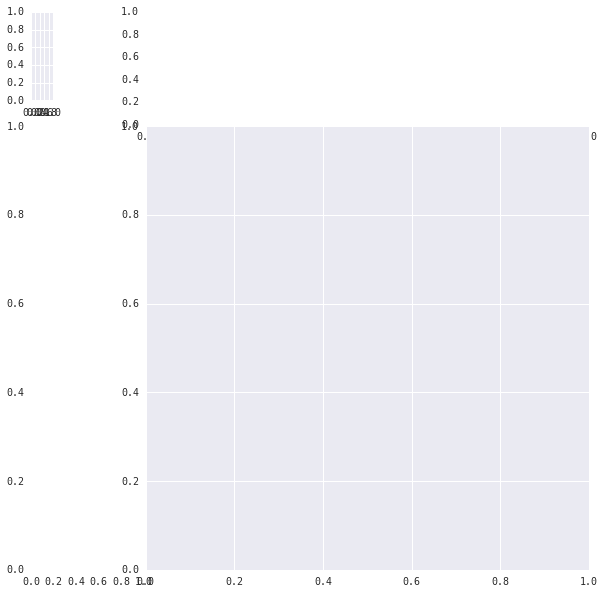

In [23]:
import pandas as pd, seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
from sklearn.datasets import load_iris
sns.set(font="monospace")
iris = load_iris()
X, y = iris.data, iris.target
DF = pd.DataFrame(X, index = ["iris_%d" % (i) for i in range(X.shape[0])], columns = iris.feature_names)

DF_corr = DF.T.corr()
DF_dism = 1 - DF_corr   # distance matrix
linkage = hc.linkage(sp.distance.squareform(DF_dism), method='average')
sns.clustermap(DF_dism, row_linkage=linkage, col_linkage=linkage)

In [21]:
names=pd.read_csv('/home/alva/projects/VBT_project/Mutated_oncogenes_DE/Samples/DMR_cluster_samples',sep='\t')
print (lncRNA.columns.isin(names.DMR))
names

[False False False False False False False False  True False False False
 False False False  True  True False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False  True  True False False False
 False False False False False False False  True  True  True  True False
 False  True  True False False  True  True  True  True  True  True  True
  True False False False False False False False False False False  True
  True  True  True False False  True  True False False False False False
 False False False]


In [26]:
names.T

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
DMR,PL12_ID,PL11_ID,PE09_ID,AL26_ID,PE02_ID,PE08_ID,PE11_ID,PE08_REL,PE09_REL,PL01_ID,...,AE14_ID,PL12_REL,PL11_REL,PL04_REL,PL04_ID,PL02_ID,PL02_REL,PL03_REL,AE14_REL,AE02_REL


In [34]:
lncRNA.columns = np.where(lncRNA.columns.isin(names.DMR), 'DMR_' + lncRNA.columns, lncRNA.columns)


In [35]:
lncRNA.columns = ['DMR_{}'.format(x) if x in names.DMR.values else x for x in lncRNA.columns]
lncRNA.head()

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,AE02_ID,DMR_AE02_REL,AE04_ID,...,DMR_PL14_ID,DMR_PL14_REL,Gene_sym,Gene_type,CHR,Start,End,Strand,Source,Biotype
0,ENSG00000215863,29.794077,1.183510,0.199710,5.926146,3.101263e-09,6.526750e-07,11.961936,18.570140,42.201084,...,17.986319,25.639833,LINC01138,lincRNA,1,147835127,147931933,-,ensembl_havana,lincRNA
1,ENSG00000267737,4.023687,1.460442,0.455385,3.207047,1.341052e-03,1.952537e-02,2.990484,3.979316,0.000000,...,0.000000,0.000000,AC061992.2,lincRNA,17,76311810,76343879,+,havana,lincRNA
2,ENSG00000266928,1.547551,1.756225,0.589669,2.978325,2.898289e-03,3.377800e-02,0.000000,0.000000,0.000000,...,0.000000,0.000000,CTB-70G10.1,lincRNA,19,28785000,28804407,-,havana,lincRNA
3,ENSG00000243902,4.824079,1.287775,0.440135,2.925866,3.434988e-03,3.781754e-02,5.980968,0.000000,0.000000,...,0.000000,0.000000,RP1-63G5.5,sense_overlapping,22,37735624,37823480,-,havana,sense_overlapping
4,ENSG00000230812,10.989745,1.260621,0.287360,4.386898,1.149788e-05,5.442258e-04,10.965108,27.855210,22.155569,...,8.301378,24.907266,RP4-794H19.4,lincRNA,1,59486059,59510286,+,havana,lincRNA


In [12]:
df.columns = [str(col) + '_x' for col in df.columns]


'/home/alva/projects/VBT_project/Mutated_oncogenes_DE/CPRFZ'

In [15]:
power(2,0.58)

1.4948492486349383

In [201]:
Pedatric ='/home/alva/projects/VBT_project/DE_expression/Wholeset/All_samples/results/All_Pedatric_samples_counts-normalized_DEseq_results.txt'
Pedatric = pd.read_csv(Pedatric, sep="\t", header=0)
Pedatric = pd.merge(ref_chr_pos,Pedatric,on='Geneid')
Pedatric.shape

(57905, 64)

In [229]:
Cis_PC_peda ='/home/alva/projects/VBT_project/DE_expression/Wholeset/Pedatric/Great/PC_TRANS_6zerokb'
Cis_PC_peda = pd.read_csv(Cis_PC_peda, sep="\t", header=0)
Cis_PC_peda = pd.merge(Pedatric,Cis_PC_peda,on='Gene_sym')
UP=Cis_PC_peda.query('log2FoldChange >= 0.58 and padj <= 0.05')
D=Cis_PC_peda.query('log2FoldChange <=-0.58 and padj <= 0.05')
DE=pd.concat([UP, D])


In [242]:
Cis_PC_peda ='/home/alva/projects/VBT_project/DE_expression/Wholeset/All_samples/results/Annon_0.58_All_Pedatric_samples_counts-normalized_DEseq_results.txt'
Cis_PC_peda = pd.read_csv(Cis_PC_peda, sep="\t", header=0)
Cis_PC_peda_exp=pd.merge(Cis_peda,Cis_PC_peda.loc[:,'PL12_ID':'Gene_sym'],on='Gene_sym')

Cis_PC_peda_exp.to_csv('/home/alva/projects/VBT_project/DE_expression/Wholeset/Pedatric/Great/lncRNA_TRANS_exp', sep='\t',index=False)
Cis_PC_peda_exp.shape
                     

(137, 50)

In [172]:
Trans_PC ='/home/alva/projects/VBT_project/DE_expression/Wholeset/Pedatric/Great/Correlation/PC_TRANS_exp'
Trans_PC = pd.read_csv(Trans_PC, sep="\t", header=0)
#Cis_peda = Cis_peda['PC'].str.extract('(\d+)').astype(int)

#Cis_peda['Species assembly: hg19'].str.replace(r"\(\d.*\)","\t")
#Cis_peda =Cis_peda.PC.astype(int)
#Cis_peda=Cis_peda.apply(lambda st: st[object.find("(")+1:object.find(")")])
#Cis_peda = Cis_peda[np.isfinite(Cis_peda['PC'])]
#Cis_peda = Cis_peda[np.isfinite(Cis_peda['PC2'])]
#Cis_peda = Cis_peda[Cis_peda.PC != "NONE"]
#Cis_peCis_pedada['PC2']=Cis_peda.PC2.astype(str)
#Cis_peda[['PC2','Starnd']] =  Cis_peda.PC2.str.extract('([+-])(\d*)', expand=True)


In [240]:
Cis_peda ='/home/alva/projects/VBT_project/DE_expression/Wholeset/Pedatric/Great/LNC_TRANS'
Cis_peda = pd.read_csv(Cis_peda, sep="\t", header=0).dropna()
#Cis_peda = Cis_peda['PC'].str.extract('(\d+)').astype(int)

#Cis_peda['Species assembly: hg19'].str.replace(r"\(\d.*\)","\t")
#Cis_peda =Cis_peda.PC.astype(int)
#Cis_peda=Cis_peda.apply(lambda st: st[object.find("(")+1:object.find(")")])
#Cis_peda = Cis_peda[np.isfinite(Cis_peda['PC'])]
#Cis_peda = Cis_peda[np.isfinite(Cis_peda['PC2'])]
#Cis_peda = Cis_peda[Cis_peda.PC != "NONE"]
#Cis_peCis_pedada['PC2']=Cis_peda.PC2.astype(str)
#Cis_peda[['PC2','Starnd']] =  Cis_peda.PC2.str.extract('([+-])(\d*)', expand=True)

Cis_peda.head()



,Gene_sym
0,RP4555D20.2
1,RP51180C10.2
2,AC073236.3
3,RP11728K20.3
4,TEX41
